In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
healthy_pre = sc.read_h5ad("../Code/Data/GSE165080_healthy.h5ad")

healthy_post = sc.read_h5ad("../Code/Data/Annotation/GSE165080_healthy_annotation.h5ad")

In [4]:
healthy_pre.var

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std
AL627309.1,190,False,190,0.004071,99.592921,190.0,1.265033e-11,0.065218
AL627309.3,4,False,4,0.000086,99.991430,4.0,-2.270673e-12,0.012222
AL627309.5,619,False,619,0.013584,98.673780,634.0,-1.708836e-11,0.111150
AP006222.2,6,False,6,0.000129,99.987145,6.0,-1.220331e-12,0.012087
LINC01409,3709,False,3709,0.089322,92.053392,4169.0,-2.415063e-11,0.300029
...,...,...,...,...,...,...,...,...
AC233755.1,87,False,87,0.012641,99.813601,590.0,-6.469111e-12,0.087432
AC141272.1,5,False,5,0.000107,99.989287,5.0,1.821794e-12,0.011831
AC007325.1,47,False,47,0.001007,99.899302,47.0,-7.465264e-12,0.028509
AC007325.4,24,False,24,0.000514,99.948580,24.0,-5.439095e-12,0.023726


In [5]:
healthy_pre.obs["cell_type_l1"] = healthy_post.obs["predicted.celltype.l1"]
healthy_pre.obs["cell_type_l2"] = healthy_post.obs["predicted.celltype.l2"]
healthy_pre.obs["cell_type_l3"] = healthy_post.obs["predicted.celltype.l3"]
healthy_pre

AnnData object with n_obs × n_vars = 46160 × 27426
    obs: 'Age', 'Gender', 'BioSample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type_l1', 'cell_type_l2', 'cell_type_l3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
healthy_pre.obs

,Age,Gender,BioSample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type_l1,cell_type_l2,cell_type_l3
AAACCTGAGAGTTGGC-1,34,female,SAMN17379694,3734,3734,11946.0,529.0,4.428260,1,Mono,CD14 Mono,CD14 Mono
AAACCTGAGGGCTTGA-1,34,female,SAMN17379694,2001,2001,4745.0,338.0,7.123288,22,other T,gdT,CD8 TEM_6
AAACCTGCAAGCTGTT-1,34,female,SAMN17379694,2471,2471,7979.0,384.0,4.812633,5,CD8 T,CD8 Naive,CD8 Naive_2
AAACCTGCAATAAGCA-1,34,female,SAMN17379694,1487,1487,2865.0,371.0,12.949389,16,NK,NK,NK_2
AAACCTGCAATGTAAG-1,34,female,SAMN17379694,2423,2423,6729.0,550.0,8.173576,19,CD8 T,CD8 TCM,CD8 TCM_3
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTGAACG-1,39,male,SAMN17379591,1054,1054,2108.0,136.0,6.451612,2,CD4 T,CD4 TCM,CD4 TCM_1
TTTGTCACACGGTAGA-1,39,male,SAMN17379591,757,757,1257.0,199.0,15.831344,17,CD8 T,NK,NK_1
TTTGTCACAGGACGTA-1,39,male,SAMN17379591,1882,1882,5846.0,178.0,3.044817,2,CD4 T,CD4 TCM,CD4 TCM_1
TTTGTCAGTCCAGTGC-1,39,male,SAMN17379591,1407,1407,3106.0,194.0,6.245975,15,CD8 T,CD8 TEM,CD8 TEM_6


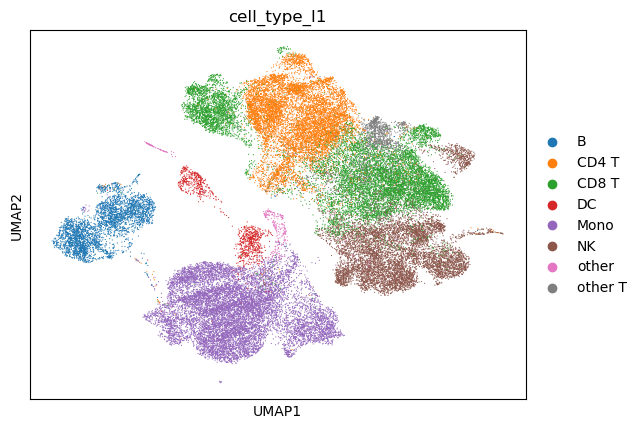

In [7]:
sc.pl.umap(healthy_pre, color = "cell_type_l1")

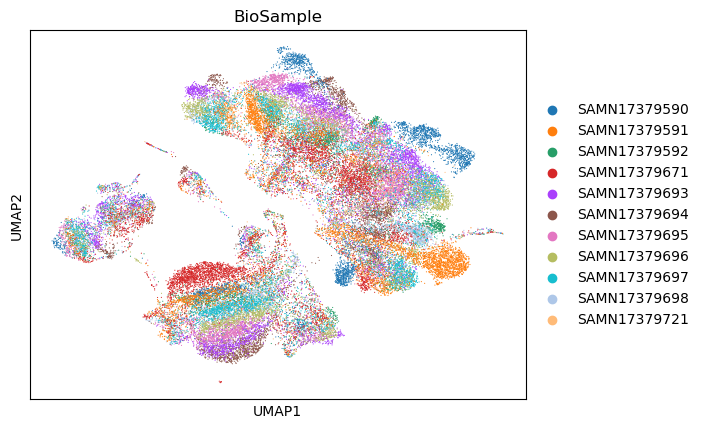

In [8]:
sc.pl.umap(healthy_pre, color = "BioSample")

# 執行BBKNN

In [9]:
#!pip install bbknn
import scanpy as sc
import bbknn

In [10]:
bbknn.bbknn(healthy_pre, batch_key='BioSample')

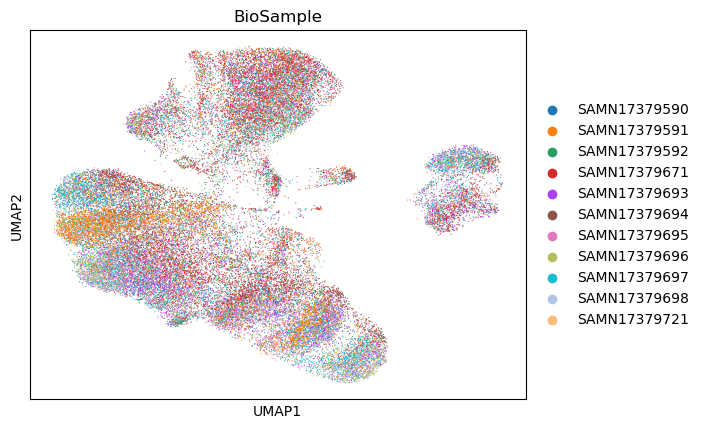

In [11]:
sc.tl.umap(healthy_pre)
sc.pl.umap(healthy_pre, color = "BioSample")

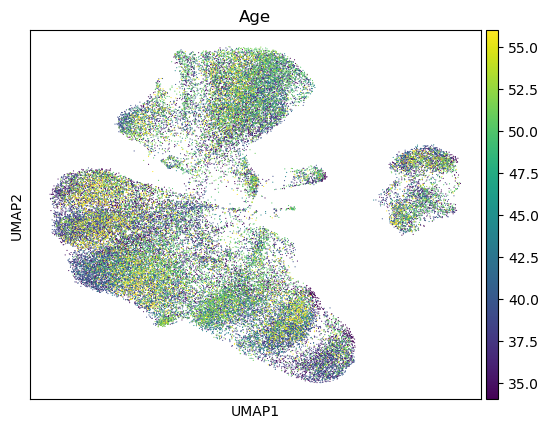

In [12]:
sc.pl.umap(healthy_pre, color = "Age")

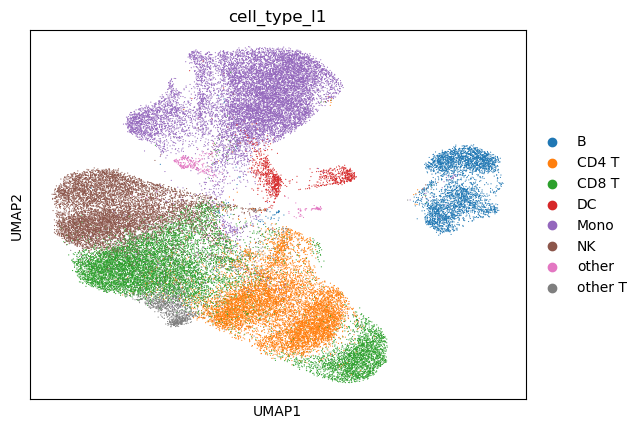

In [13]:
sc.pl.umap(healthy_pre, color = "cell_type_l1")

In [14]:
healthy_pre = healthy_pre[healthy_pre.obs["cell_type_l1"] != "other", :]

# 把每個sample分開

In [60]:
# 把每個 sample 放在 dictionary
biosample = {}
for i in healthy_pre.obs.BioSample.unique():
    biosample[i] = healthy_pre[healthy_pre.obs['BioSample'] == i]
for i in biosample:
    print(i)

SAMN17379694
SAMN17379721
SAMN17379592
SAMN17379590
SAMN17379695
SAMN17379693
SAMN17379698
SAMN17379697
SAMN17379696
SAMN17379671
SAMN17379591


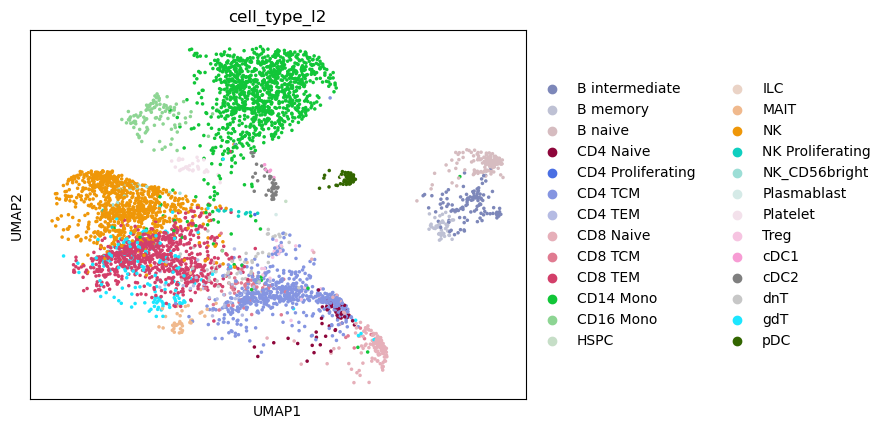

In [53]:
biosample["SAMN17379694"]
sc.pl.umap(biosample["SAMN17379694"], color = "cell_type_l2")

In [62]:
biosample["SAMN17379694"]

View of AnnData object with n_obs × n_vars = 4627 × 27426
    obs: 'Age', 'Gender', 'BioSample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type_l1', 'cell_type_l2', 'cell_type_l3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap', 'cell_type_l1_colors', 'BioSample_colors', 'Gender_colors', 'cell_type_l2_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
# 把total的healthy donor分別做一個標記

# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
# 如果符合這些條件就取為...............若不符合則補other
donor_map = {'5': 'donor 1', '13': 'donor 2', '14': 'donor 3', '19': 'donor 4'}
healthy.obs['donor'] = healthy.obs.index.to_series().str.extract(r'-(5|13|14|19)$', expand=False).map(donor_map).fillna('other')
healthy.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,donor
AAACCCAAGTGTAGAT-5,1699,1699,5398.0,515.0,9.540570,15,donor 1
AAACCCACACAATGCT-5,2184,2184,7260.0,642.0,8.842975,15,donor 1
AAACCCACATACTGAC-5,1729,1729,4522.0,521.0,11.521450,11,donor 1
AAACCCACATGAGATA-5,1798,1798,5077.0,365.0,7.189285,23,donor 1
AAACCCAGTTTCGTGA-5,1727,1727,4872.0,457.0,9.380131,11,donor 1
...,...,...,...,...,...,...,...
TTTGTTGAGGCTTTCA-19,1900,1900,7632.0,632.0,8.280923,21,donor 4
TTTGTTGCAACAAGAT-19,908,908,1692.0,109.0,6.442080,0,donor 4
TTTGTTGCAATCTGCA-19,1608,1608,4382.0,409.0,9.333637,0,donor 4
TTTGTTGTCCTGTAAG-19,1956,1956,5755.0,687.0,11.937446,0,donor 4


In [5]:
healthy.obs["cell_type_l1"] = healthy_cell.obs["predicted.celltype.l1"]
healthy.obs["cell_type_l2"] = healthy_cell.obs["predicted.celltype.l2"]
healthy.obs["cell_type_l3"] = healthy_cell.obs["predicted.celltype.l3"]

In [6]:
healthy

AnnData object with n_obs × n_vars = 18327 × 23311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'donor', 'cell_type_l1', 'cell_type_l2', 'cell_type_l3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
healthy.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,donor,cell_type_l1,cell_type_l2,cell_type_l3
AAACCCAAGTGTAGAT-5,1699,1699,5398.0,515.0,9.540570,15,donor 1,CD8 T,CD8 TEM,CD8 TEM_2
AAACCCACACAATGCT-5,2184,2184,7260.0,642.0,8.842975,15,donor 1,CD8 T,CD8 TEM,CD8 TEM_2
AAACCCACATACTGAC-5,1729,1729,4522.0,521.0,11.521450,11,donor 1,NK,NK,NK_1
AAACCCACATGAGATA-5,1798,1798,5077.0,365.0,7.189285,23,donor 1,Mono,CD14 Mono,CD14 Mono
AAACCCAGTTTCGTGA-5,1727,1727,4872.0,457.0,9.380131,11,donor 1,other T,gdT,gdT_2
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGCTTTCA-19,1900,1900,7632.0,632.0,8.280923,21,donor 4,B,B intermediate,B intermediate lambda
TTTGTTGCAACAAGAT-19,908,908,1692.0,109.0,6.442080,0,donor 4,NK,NK,NK_2
TTTGTTGCAATCTGCA-19,1608,1608,4382.0,409.0,9.333637,0,donor 4,NK,NK,NK_1
TTTGTTGTCCTGTAAG-19,1956,1956,5755.0,687.0,11.937446,0,donor 4,NK,NK,NK_1


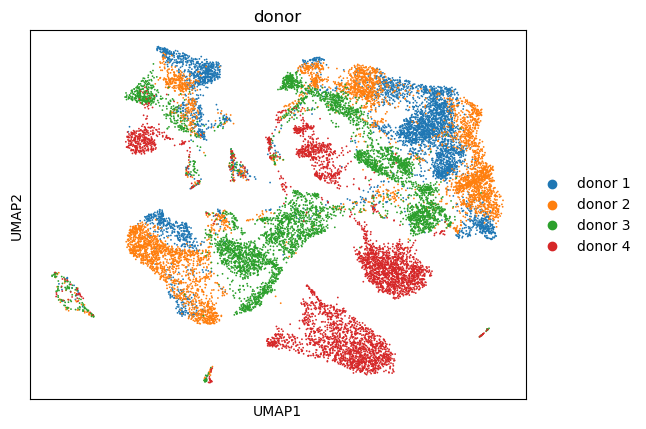

In [8]:
sc.pl.umap(healthy, color = "donor")

# 將每個Healthy Donor獨立拉出來看

In [14]:
healthy.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,donor,cell_type_l1,cell_type_l2,cell_type_l3
AAACCCAAGTGTAGAT-5,1699,1699,5398.0,515.0,9.540570,15,donor 1,CD8 T,CD8 TEM,CD8 TEM_2
AAACCCACACAATGCT-5,2184,2184,7260.0,642.0,8.842975,15,donor 1,CD8 T,CD8 TEM,CD8 TEM_2
AAACCCACATACTGAC-5,1729,1729,4522.0,521.0,11.521450,11,donor 1,NK,NK,NK_1
AAACCCACATGAGATA-5,1798,1798,5077.0,365.0,7.189285,23,donor 1,Mono,CD14 Mono,CD14 Mono
AAACCCAGTTTCGTGA-5,1727,1727,4872.0,457.0,9.380131,11,donor 1,other T,gdT,gdT_2
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGCTTTCA-19,1900,1900,7632.0,632.0,8.280923,21,donor 4,B,B intermediate,B intermediate lambda
TTTGTTGCAACAAGAT-19,908,908,1692.0,109.0,6.442080,0,donor 4,NK,NK,NK_2
TTTGTTGCAATCTGCA-19,1608,1608,4382.0,409.0,9.333637,0,donor 4,NK,NK,NK_1
TTTGTTGTCCTGTAAG-19,1956,1956,5755.0,687.0,11.937446,0,donor 4,NK,NK,NK_1


In [15]:
# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
pattern_5 = r"-5$"
pattern_13 = r"-13$"
pattern_14 = r"-14$"
pattern_19 = r"-19$"

# 每個healthy donor的結果
healthy_5 = healthy[healthy.obs_names.str.contains(pattern_5)]
healthy_13 = healthy[healthy.obs_names.str.contains(pattern_13)]
healthy_14 = healthy[healthy.obs_names.str.contains(pattern_14)]
healthy_19 = healthy[healthy.obs_names.str.contains(pattern_19)]

In [16]:
# 移除 other
healthy_5 = healthy_5[healthy_5.obs["cell_type_l1"] != "other", :]
healthy_13 = healthy_13[healthy_13.obs["cell_type_l1"] != "other", :]
healthy_14 = healthy_14[healthy_14.obs["cell_type_l1"] != "other", :]
healthy_19 = healthy_19[healthy_19.obs["cell_type_l1"] != "other", :]

In [17]:
healthy_19.obs_names

Index(['AAACCCAAGCATTGTC-19', 'AAACCCACACCTGCTT-19', 'AAACCCACATGTAACC-19',
       'AAACCCAGTCGTGATT-19', 'AAACCCAGTCTCAGGC-19', 'AAACGAAAGCGACTTT-19',
       'AAACGAAAGGATCACG-19', 'AAACGAAGTAAGGTCG-19', 'AAACGAAGTCCAAATC-19',
       'AAACGAAGTGAAGCTG-19',
       ...
       'TTTGGAGTCTTGCAGA-19', 'TTTGGTTCATGGATCT-19', 'TTTGGTTTCATGACAC-19',
       'TTTGGTTTCCGCACTT-19', 'TTTGTTGAGAGGCGTT-19', 'TTTGTTGAGGCTTTCA-19',
       'TTTGTTGCAACAAGAT-19', 'TTTGTTGCAATCTGCA-19', 'TTTGTTGTCCTGTAAG-19',
       'TTTGTTGTCTGGGATT-19'],
      dtype='object', length=4229)

D:\Python(Anaconda)\Anaconda python\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


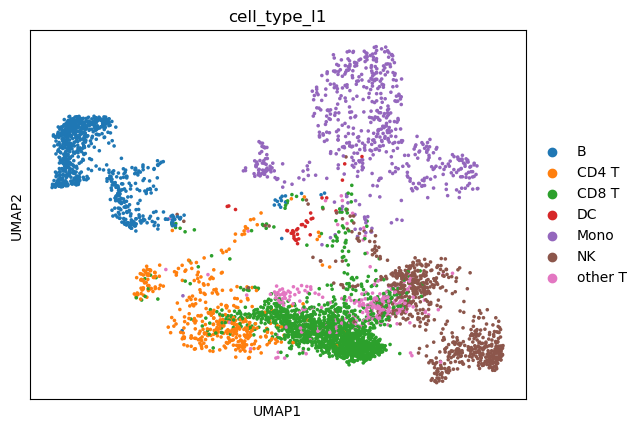

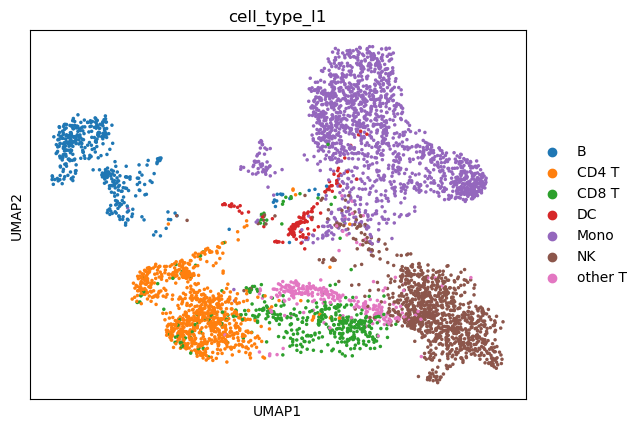

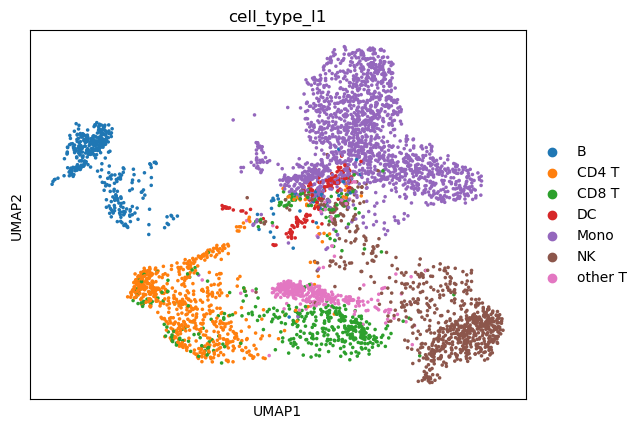

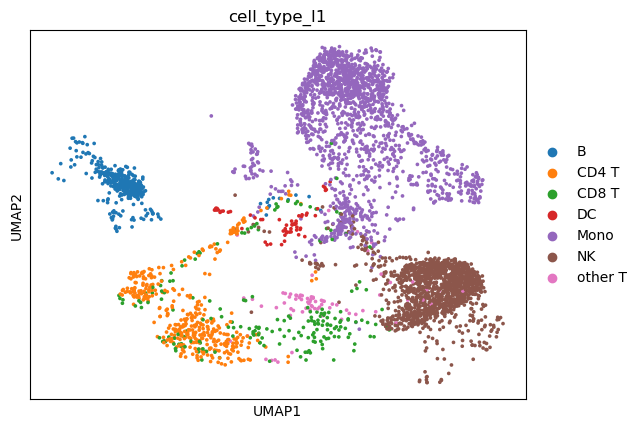

In [18]:
sc.pl.umap(healthy_5, color = "cell_type_l1")
sc.pl.umap(healthy_13, color = "cell_type_l1")
sc.pl.umap(healthy_14, color = "cell_type_l1")
sc.pl.umap(healthy_19, color = "cell_type_l1")

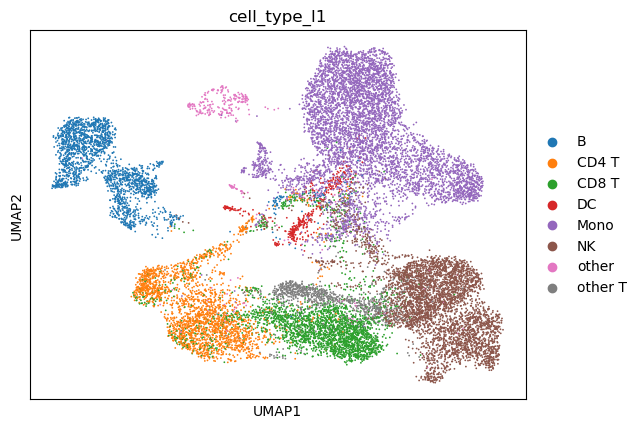

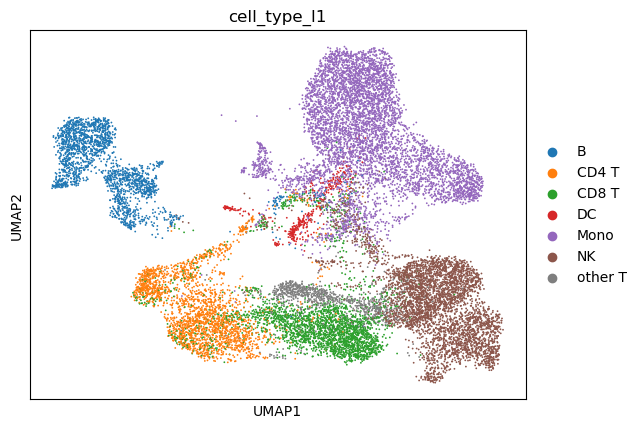

In [19]:
# All healthy donors
sc.pl.umap(healthy, color = "cell_type_l1")

# Cause have other gene, so filter other gene first
healthy = healthy[healthy.obs["cell_type_l1"] != "other", :]

# All healthy donors without other
sc.pl.umap(healthy, color = "cell_type_l1")

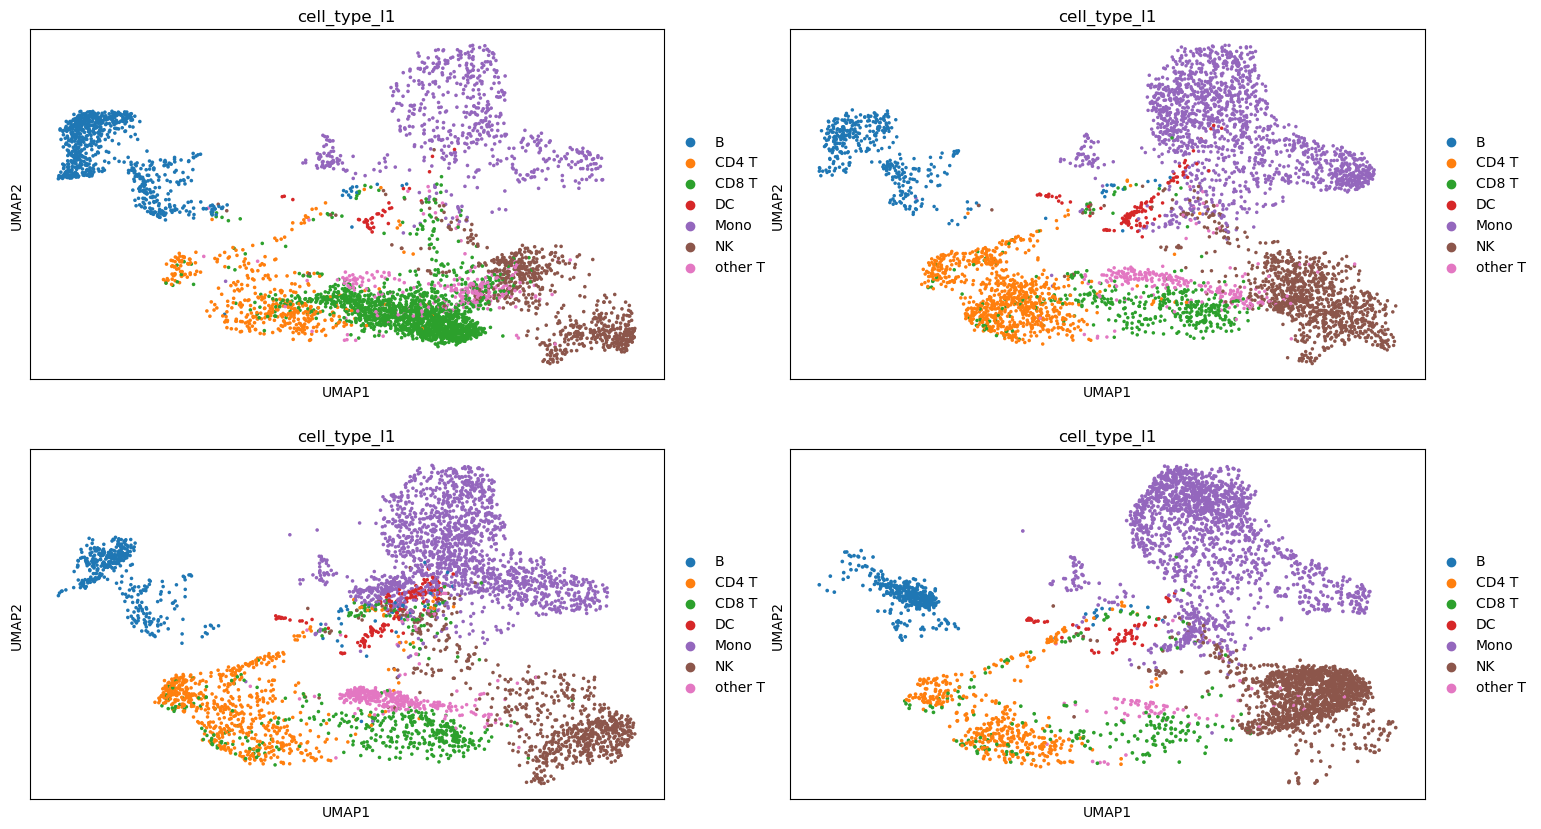

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))
sc.pl.umap(healthy_5, color = "cell_type_l1",ax=axs[0, 0], show=False)
sc.pl.umap(healthy_13, color = "cell_type_l1",ax=axs[0, 1], show=False)
sc.pl.umap(healthy_14, color = "cell_type_l1",ax=axs[1, 0], show=False)
sc.pl.umap(healthy_19, color = "cell_type_l1",ax=axs[1, 1], show=False)

plt.show()